In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
BLPS_dir = "/home/dell/1_work/7_ABACUS_ML_OF/1_test/0_generate_data/2_ks-pbe/0_data_set/a_alloys/2_scf/"
NC_dir = "/home/dell/1_work/7_ABACUS_ML_OF/1_test/0_generate_data/9_ks-pbe-nc/0_data_set/a_alloys/2_scf/"

# types = ['4_single']
types = ['0_LiMg', '1_MgAl', '2_LiAl', '3_LiMgAl', '4_single']

In [3]:
def readin_force(file):
    try:
        with open(file) as f:
            tmp = f.readline()
            natom = 0
            force = []
            while "TOTAL-FORCE (eV/Angstrom)" not in tmp:
                tmp = f.readline()
                if "TOTAL ATOM NUMBER" in tmp:
                    natom = int(tmp.split()[-1])
            if "TOTAL-FORCE (eV/Angstrom)" in tmp:
                for i in range(4): f.readline()
                for i in range(natom):
                    tmp = f.readline().split()[-3:]
                    for j in range(3):
                        force.append(float(tmp[j]))
                return force
            else:
                print('Find no force in {0}!'.format(file))
                return False        
    except:
        return False
    
print(readin_force(BLPS_dir+'/0_LiMg/mp-1016222/OUT.oftest/running_scf.log'))

def readin_stress(file):
    try:
        with open(file) as f:
            tmp = f.readline()
            natom = 0
            stress = []
            while "TOTAL-STRESS (KBAR)" not in tmp:
                tmp = f.readline()
            if "TOTAL-STRESS (KBAR)" in tmp:
                for i in range(3): f.readline()
                for i in range(3):
                    tmp = f.readline().split()
                    for j in range(3):
                        stress.append(float(tmp[j]))
                return stress
            else:
                print('Find no stress in {0}!'.format(file))
                return False        
    except:
        return False
    
print(readin_stress(BLPS_dir+'/0_LiMg/mp-1016222/OUT.oftest/running_scf.log'))

[0.0, 0.0, 0.02293733, 0.0, 0.0, -0.00613729, 0.0, 0.0, 0.06676037, 0.0, 0.0, -0.08356042]
[-3.963603, 0.0, 0.0, 0.0, 6.001284, 0.0, 0.0, 0.0, 5.910466]


In [4]:
def collect_stru(dir):
    strus = []
    for each in os.scandir(dir):
        if each.is_dir() and each.name != 'log':
            strus.append(each.name)
    return strus

def mae(data, target):
    return np.mean(np.abs(data - target))

In [11]:
running_log_file = "/OUT.oftest/running_scf.log"

blps_force = []
nc_force = []
for sub_dir in types:
    blps_sub_force = []
    nc_sub_force = []

    blps_dir = BLPS_dir + sub_dir
    nc_dir = NC_dir + sub_dir
    blps_strus = collect_stru(blps_dir)
    nc_strus = collect_stru(nc_dir)

    for structure in blps_strus:
        # print("Collecting {0}/{1}".format(sub_dir, structure))
        blps_temp_force = readin_force("{0}/{1}/{2}".format(blps_dir, structure, running_log_file))
        nc_temp_force = readin_force("{0}/{1}/{2}".format(nc_dir, structure, running_log_file))

        if blps_temp_force and nc_temp_force:
            # print(blps_temp_force)
            # print(nc_temp_force)
            assert(len(blps_temp_force) == len(nc_temp_force))
            blps_sub_force += blps_temp_force
            nc_sub_force += nc_temp_force
            # print("{0}/{1} done".format(sub_dir, structure))
    
    blps_force.append(np.array(blps_sub_force))
    nc_force.append(np.array(nc_sub_force))
    # np.save("{0}-blps-force.npy".format(sub_dir), blps_sub_force)
    # np.save("{0}-nc-force.npy".format(sub_dir), nc_sub_force)

# print(blps_force[2])
# print(nc_force[2])

In [10]:
running_log_file = "/OUT.oftest/running_scf.log"

blps_stress = []
nc_stress = []
for sub_dir in types:
    blps_sub_stress = []
    nc_sub_stress = []

    blps_dir = BLPS_dir + sub_dir
    nc_dir = NC_dir + sub_dir
    blps_strus = collect_stru(blps_dir)
    nc_strus = collect_stru(nc_dir)

    for structure in blps_strus:
        # print("Collecting {0}/{1}".format(sub_dir, structure))
        blps_temp_stress = readin_stress("{0}/{1}/{2}".format(blps_dir, structure, running_log_file))
        nc_temp_stress = readin_stress("{0}/{1}/{2}".format(nc_dir, structure, running_log_file))

        if blps_temp_stress and nc_temp_stress:
            # print(blps_temp_stress)
            # print(nc_temp_stress)
            # assert(len(blps_temp_stress) == len(nc_temp_stress))
            blps_sub_stress += blps_temp_stress
            nc_sub_stress += nc_temp_stress
            # print("{0}/{1} done".format(sub_dir, structure))
    
    blps_stress.append(np.array(blps_sub_stress))
    nc_stress.append(np.array(nc_sub_stress))
    # np.save("{0}-blps-stress.npy".format(sub_dir), blps_sub_stress)
    # np.save("{0}-nc-stress.npy".format(sub_dir), nc_sub_stress)

# print(blps_stress[2])
# print(nc_stress[2])

In [7]:
print('MAE (FORCE)')
for i in range(5):
    print(mae(blps_force[i], nc_force[i]))

print('MAE (STRESS)')
for i in range(5):
    print(mae(blps_stress[i], nc_stress[i]))

MAE (FORCE)
0.02028583641242938
0.005461631169284467
0.19505269988095236
0.028682981423113655
0.0
MAE (STRESS)
2.890258433333333
3.1906869388888883
4.564065344444445
1.2824645925925928
2.7557392222222226


(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

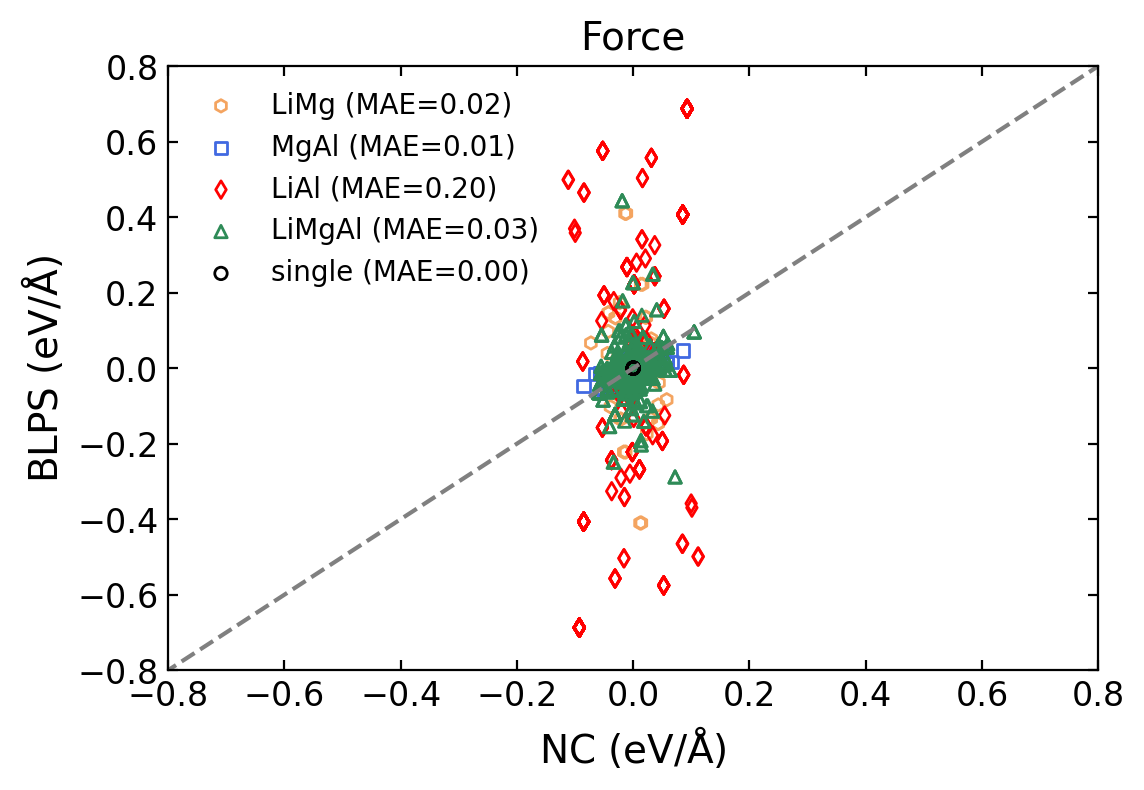

In [59]:
colors = ['sandybrown', 'royalblue', 'r', 'seagreen', 'k']
markers = ['h','s','d','^','o']

plt.figure(dpi=200)
for i in range(5):
    plt.scatter(nc_force[i], blps_force[i], marker=markers[i], 
                label="{0} (MAE={1:.2f})".format(types[i][2:], mae(blps_force[i], nc_force[i])), 
                s=20, c='none', edgecolors=colors[i])
plt.plot(np.array([-1,1]), np.array([-1,1]), color='gray', linestyle='--')
# plt.xlim(-0.2, 0.2)
plt.xlim(-0.8, 0.8)
plt.ylim(-0.8, 0.8)
plt.legend(fontsize=10, loc=2)
plt.xlabel(r'NC (eV/$\rm{\AA}$)', fontsize=14)
plt.ylabel(r'BLPS (eV/$\rm{\AA}$)', fontsize=14)
plt.title('Force', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

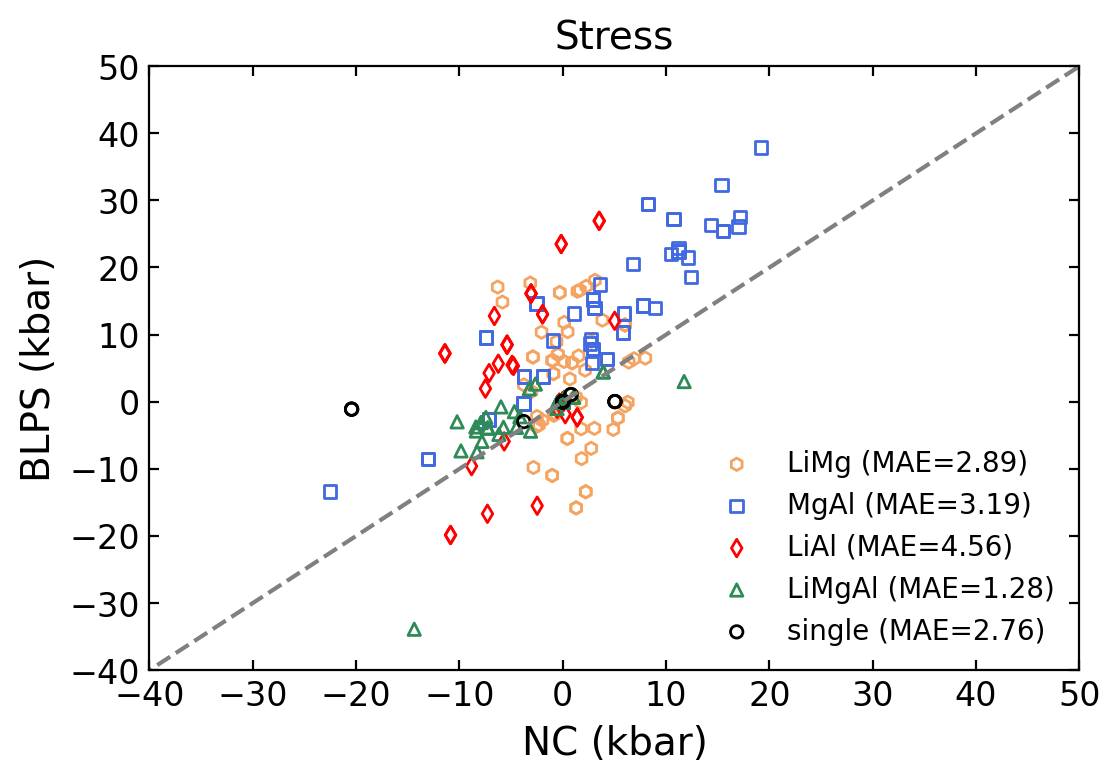

In [58]:
colors = ['sandybrown', 'royalblue', 'r', 'seagreen', 'k']
markers = ['h','s','d','^','o']

plt.figure(dpi=200)
for i in range(5):
    plt.scatter(nc_stress[i], blps_stress[i], marker=markers[i], 
                label="{0} (MAE={1:.2f})".format(types[i][2:], mae(blps_stress[i], nc_stress[i])), 
                s=20, c='none', edgecolors=colors[i])
plt.plot(np.array([-50,50]), np.array([-50,50]), color='gray', linestyle='--')
# plt.xlim(-0.2, 0.2)
plt.xlim(-40, 50)
plt.ylim(-40, 50)
plt.legend(fontsize=10)
plt.xlabel('NC (kbar)', fontsize=14)
plt.ylabel('BLPS (kbar)', fontsize=14)
plt.title('Stress', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [18]:
def read_data(data_file):
    structures = []
    volumes = dict()
    Eform = dict()
    Energy = dict()
    if not os.path.exists(data_file):
        print('WARNING: {0} doesnot exist.'.format(data_file))
    with open(data_file) as f:
        f.readline()
        temp = f.readline().split()
        while len(temp) > 2:
            if float(temp[4]) < 0:
                stru = temp[0]
                if stru != "./4_single/fcc_Al" and stru != "./4_single/hcp_Mg" and stru != "./4_single/bcc_Li":
                    structures.append(stru)
                    volumes[stru] = float(temp[3])
                    Energy[stru] = float(temp[4])
                    Eform[stru] = float(temp[5])/1000
            temp = f.readline().split()
    print("collect {0} done.".format(data_file))
    return structures, volumes, Eform, Energy
            
# folders = []
# for each in os.scandir('.'):
#     if each.is_dir() and each.name[0].isdigit():
#         folders.append(each.name)
# folders.sort()
folders = [BLPS_dir, NC_dir]

labels = {0:"NC", 1:"BLPS"}

# x = int(input("Choose x axes {0}:".format(folders)))
x = 0
# ystr = input("Choose y axes: {0}:".format(folders)).split()
ystr = "1"
ylist = [int(_) for _ in ystr]
ny = len(ylist)

# suffix = input("Please enter the suffix of graphs:")

x_stru, x_volume, x_Eform, x_Energy = read_data(folders[x]+"/data")
y_sturs   = [0] * ny
y_volumes = [0] * ny
y_Eforms  = [0] * ny
y_Energys = [0] * ny
for i in range(ny):
    y_sturs[i], y_volumes[i], y_Eforms[i], y_Energys[i] = read_data(folders[ylist[i]]+"/data")
    print("eform", max(y_Eforms[i].values()), min(y_Eforms[i].values()))
    print("energy",max(y_Energys[i].values()), min(y_Energys[i].values()))




collect /home/dell/1_work/7_ABACUS_ML_OF/1_test/0_generate_data/2_ks-pbe/0_data_set/a_alloys/2_scf//data done.
collect /home/dell/1_work/7_ABACUS_ML_OF/1_test/0_generate_data/9_ks-pbe-nc/0_data_set/a_alloys/2_scf//data done.
eform 0.8797878904650815 -0.19553002448049028
energy -193.83498221632306 -1883.1700815131735


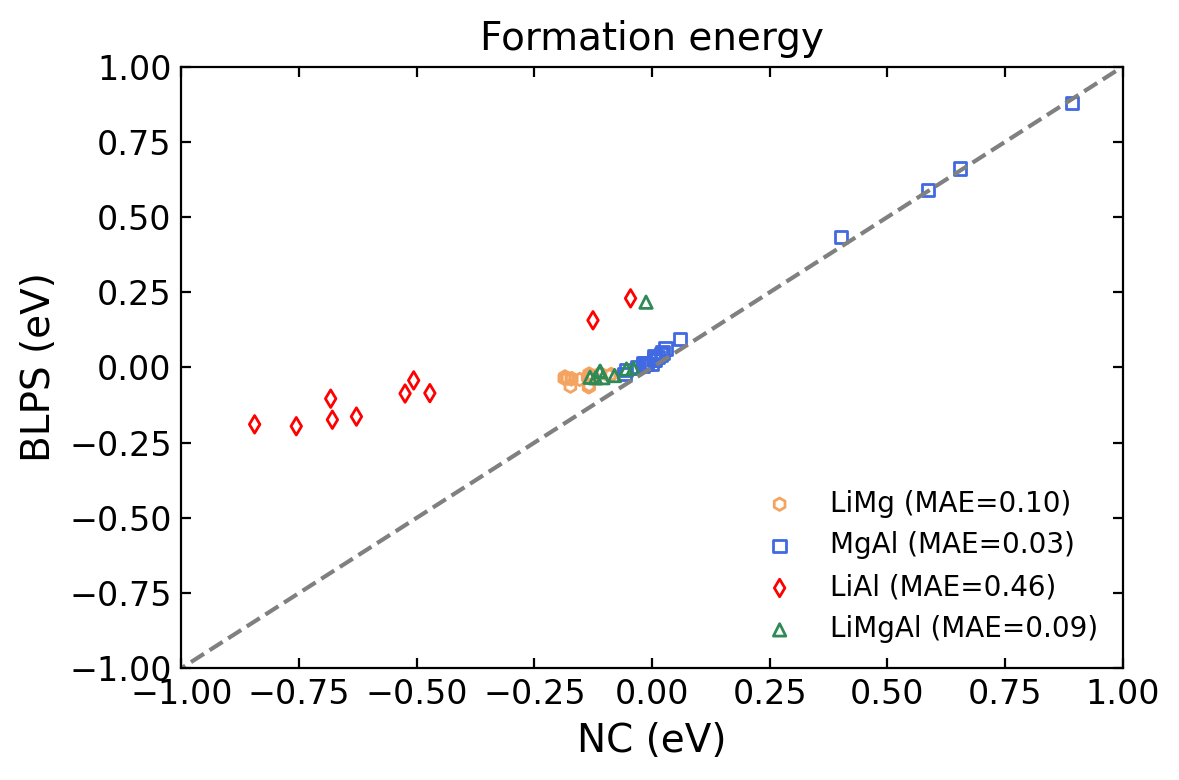

In [57]:
colors = ['sandybrown', 'royalblue', 'r', 'seagreen', 'k']
markers = ['h','s','d','^','o']

maes = [0] * 4
for i in range(ny):
    y_stru = y_sturs[i]
    y_Eform = y_Eforms[i]
    n = [0,0,0,0]
    for struc in x_stru:
        if struc in y_stru:
            j = types.index(struc.split('/')[1])
            if j == 4:
                continue
            else:
                maes[j] += abs(x_Eform[struc] - y_Eform[struc])
            n[j] += 1
    for i in range(4):
        maes[i] /= n[i]

# xmin = -0.04
# xmax = 0.12
xmin = -1
xmax = 1
# xmax = 0.1
plt.figure(dpi=200)
for i in range(ny):
    y_stru = y_sturs[i]
    y_Eform = y_Eforms[i]
    n = [0,0,0,0]
    for struc in x_stru:
        if struc in y_stru:
            j = types.index(struc.split('/')[1])
            if j == 4:
                continue
            elif n[j] == 0:
                plt.scatter(x_Eform[struc], y_Eform[struc], marker=markers[j], s=20, c='none', edgecolors=colors[j], label="{0} (MAE={1:.2f})".format(types[j][2:], maes[j]))
            else:
                plt.scatter(x_Eform[struc], y_Eform[struc], marker=markers[j], s=20, c='none', edgecolors=colors[j])
            # if labels[ylist[i]] == "ML-FEG" and struc == "mp-1038818":
            #     plt.scatter(x_Eform[struc], y_Eform[struc], marker='^', color=colors[i])
            n[j] += 1
plt.plot(np.array([-50,50]), np.array([-50,50]), color='gray', linestyle='--')
plt.legend(fontsize=10, loc=4)
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.title("Formation energy", fontsize=14)
plt.xlabel(labels[x] + " (eV)", fontsize=14)
plt.ylabel("BLPS (eV)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.savefig("figs/eform{0}.png".format(suffix), dpi=350)

In [ ]:
# # xmin = -41.45
# # xmax = -40.55
# xmin = -51
# xmax = -25
# # xmin = -70
# # xmax = -20
# plt.figure()
# plt.plot(np.linspace(xmin, xmax, 100), np.linspace(xmin, xmax, 100), color="gray")
# for i in range(ny):
#     y_stru = y_sturs[i]
#     y_Energy = y_Energys[i]
#     n = 0
#     for struc in x_stru:
#         if struc in y_stru and struc != "Mg_hcp" and struc != "Al_fcc":
#             print(struc)
#             if n == 0:
#                 plt.scatter(x_Energy[struc], y_Energy[struc], marker=style[i], color=colors[i], label=labels[ylist[i]])
#             else:
#                 plt.scatter(x_Energy[struc], y_Energy[struc], marker=style[i], color=colors[i])
#             if labels[ylist[i]] == "ML-FEG" and struc == "mp-1038818":
#                 plt.scatter(x_Eform[struc], y_Eform[struc], marker='^', color=colors[i])
#             n += 1
#     print(n)
# plt.legend(fontsize=14)
# # plt.xlim(xmin, xmax)
# # plt.ylim(xmin, xmax)
# plt.title('Energy per atom (eV)', fontsize=16)
# plt.xlabel(labels[x]+'DFT', fontsize=14)
# plt.ylabel("OFDFT", fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()
# plt.savefig("figs/energy{0}.png".format(suffix), dpi=350)